## Regresión Lineal
En esta actividad vamos a implementar nuestro propio algoritmo de regresión lineal para una única variable.

Para ello vamos a desarrollar todas las funciones necesarias para encontrar un modelo lineal que se ajuste a un conjunto de datos de entrada.

**Actividad 0:** 

Comencemos importando todas las librerías que vamos a necesitar para el desarrollo. A continuación crear un dataset de ejemplo aleatorio que nos sea útil para evaluar nuestro desarrollo

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

# 100 ejemplos
m=100

# esto es solo para la corrección 
np.random.seed(10)

# generamos valores aleatorios para x
x_train=30*np.random.rand(m,1)
# generamos valores aleatorios para y que esten linealmente relacionados con x
y_train=0.4*x_train+np.random.randn(m,1)

# Lo transformamos en vectores (no matrices) para simplificar el uso
x_train = x_train.flatten()
y_train = y_train.flatten()

print(f"El valor de x del primer ejemplo es {x_train[0]} y el valor de y es {y_train[0]}")
print(f"La cantidad de ejemplos es {x_train.shape[0]}")

El valor de x del primer ejemplo es 23.13961929800238 y el valor de y es 10.363555953983601
La cantidad de ejemplos es 100


### Grafico de dispersión
En este caso creamos un dataset aleatorio con 100 ejemplos, con un único feature (valores de x) y un label (valores de y).

Una vez que tenemos el dataset podemos graficar los datos.

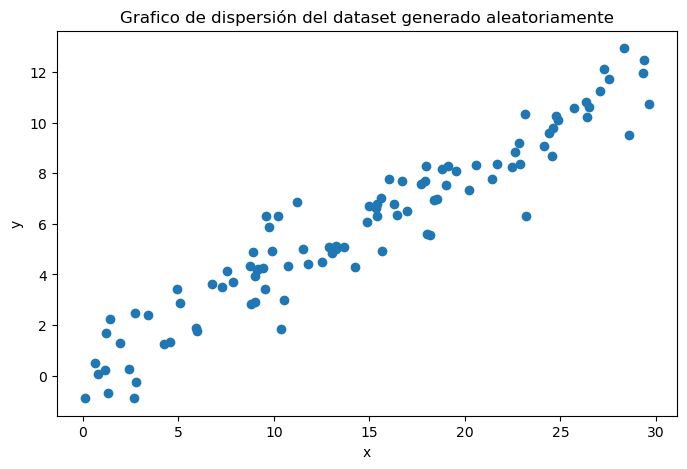

In [6]:
# Graficamos el dataset
plt.figure(figsize=(8,5))
plt.scatter(x_train,y_train)
plt.title("Grafico de dispersión del dataset generado aleatoriamente")
plt.ylabel('y')
plt.xlabel('x') 
plt.show()

### Funcion de costo
El primer paso para desarrollar un algoritmo de regresión lineal es obtener la función de costo, es decir la función que nos va a decir que tan bueno es el modelo creado y nos permite comparar con otros modelos para poder elegir el mejor.

En Regresion Lineal la función de costo suele ser una función cuadrática y está dada por la siguiente ecuación:

${J(w,b)} = \frac{1}{2m}\sum \limits _{i=1} ^{m} (f(x^{(i)}) - y^{(i)})^2$

En donde, 

${f(x)} = w*x+b$

**Actividad 1:**

Desarrollar una función Python que calcule la función de costo cuadrática dado el dataset generado (valores de x e y) y un modelo dado (es decir, los parametros w y b son conocidos y pasados por parametro a la función).

Nota: 

- x[i]: obtiene el valor del feature x del ejemplo i, es decir, $x^{(i)}$
- y[i]: obtiene el valor del label y del ejemplo i, es decir, $y^{(i)}$
- x**2: calcula el cuadrado de x. Esto será util para calcular $(f(x^{(i)}) - y^{(i)})^2$



In [7]:
def calcular_costo(x, y, w, b): 
    """
    Calcula el costo (o error) que presenta un modelo dado en relación a los datos. 
    
    Args:
      x: arreglo con los valores del feature x para cada ejemplo
      y: arreglo con los valores del label y para cada ejemplo
      w,b: parametros del modelo conocido (numericos)
    
    Objetivo:
        La función debe retornar el costo del modelo dado por parametro
    """
    # Cantidad de ejemplos
    m = x.shape[0] 
    
    cost_sum = 0 
    # 1. Por todos los ejemplos, calcular el costo de cada ejemplo:
    for i in range(m): 
        
        # 1.a. Calcular f(x)
        f_x = w * x[i] + b
        
        # 1.b. Calcular el costo cuadratico
        cost = (f_x - y[i]) ** 2 
        
        # 1.c. Sumar el costo al costo acumulado
        cost_sum = cost_sum + cost 
        
    # 2. Calcular el costo promedio    
    total_cost = cost_sum / (2*m)

    # 3. Retornar el costo total del modelo
    return total_cost

### Gradiente Descendiente

Ahora que tenemos la función de costo podemos desarrollar el algoritmo de gradiente descendiente que la minimice.

Con el algoritmo de gradiente descendiente vamos a ir iterativamente buscando modelos y calculando el costo de cada uno de ellos para quedarnos con el modelo que minimice la función de costo, es decir, que presente un error menor que el resto.

Para ello, recordemos que el algoritmo de gradiente descendiente consiste en ir buscando valores de w y b y actualizándolos en cada iteración de la siguiente manera:

$\text{repetir hasta convergencia:}$

&emsp;&emsp;&emsp;$w=w-\alpha*\frac{1}{m}\sum \limits _{i=1} ^{m}(f(x^{(i)})-y^{(i)})*x^{(i)}$

&emsp;&emsp;&emsp;$b=b-\alpha*\frac{1}{m}\sum \limits _{i=1} ^{m}(f(x^{(i)})-y^{(i)})$

en donde, 

${f(x)} = w*x+b$




**Actividad 2:**

Desarrollar una función que calcule las derivadas de la funcion de costo con respecto a w y a b, es decir, una función que devuelva los siguiente calculos:

$\text{Derivada de J(w,b) con respecto a w = }\frac{1}{m}\sum \limits _{i=1} ^{m}(f(x^{(i)})-y^{(i)})*x^{(i)}$

$\text{Derivada de J(w,b) con respecto a b = }\frac{1}{m}\sum \limits _{i=1} ^{m}(f(x^{(i)})-y^{(i)})$

In [8]:
def calcular_derivadas(x, y, w, b): 
    """
    Calcula las derivadas de la función de costo con respecto a w y b.
    Args:
      x: arreglo con los valores del feature x para cada ejemplo
      y: arreglo con los valores del label y para cada ejemplo
      w,b: parametros del modelo conocido (numericos) 
    Returns
      dj_w: Derivada de la función de costo con respecto a w
      dj_b: Derivada de la función de costo con respecto a b    
     """
    
    # Cantidad de ejemplos
    m = x.shape[0]   
    
    dj_w = 0
    dj_b = 0
    
    # 1. Por todos los ejemplos, calcular la derivada con respecto a w y a b
    for i in range(m):
        # 1.a. Calcular f(x)
        f_x = w * x[i] + b
        
        # 1.b. Calcular la derivada con respecto a w para el ejemplo i
        dj_w_i = (f_x - y[i]) * x[i] 
        
        # 1.c. Calcular la derivada con respecto a b para el ejemplo i
        dj_b_i = (f_x - y[i])
        
        # 1.d. Sumar la derivada acumulada con respecto a w
        dj_w += dj_w_i 
        
        # 1.e. Sumar la derivada acumulada con respecto a b
        dj_b += dj_b_i
    
    # 2. Obtener el promedio de las derivadas
    dj_w = dj_w / m
    
    dj_b = dj_b / m
     
    # 3. Retornar las derivadas
    return dj_w, dj_b

Ahora que tenemos una función que calcula las derivadas, solo resta actualizar los valores de w y de b simultaneamente.



$\text{repetir hasta convergencia:}$

&emsp;&emsp;&emsp;$w=w-\alpha*\frac{1}{m}\sum \limits _{i=1} ^{m}(f(x^{(i)})-y^{(i)})*x^{(i)}$

&emsp;&emsp;&emsp;$b=b-\alpha*\frac{1}{m}\sum \limits _{i=1} ^{m}(f(x^{(i)})-y^{(i)})$

en donde, 

${f(x)} = w*x+b$

**Actividad 3:**

Desarrollar una función que calcule el gradiente descendiente, es decir, que actualice los valores de w y de b utilizando la función desarrollada en la actividad anterior.



In [9]:
def gradiente_descendiente(x, y, max_iterations, alpha): 
    """
    Calcula el gradiente descendiente para encontrar los valores optimos de w y b.
    
    Args:
      x: arreglo con los valores del feature x para cada ejemplo
      y: arreglo con los valores del label y para cada ejemplo
      max_iterations: maximo de iteraciones
      alpha: learning rate
      
    Returns:
      w: valor de w luego de converger
      b: valor de b luego de converger
      J_history (List): valores historicos del costo (para graficar)
      wb_history (list): valores historicos de w y de b (para graficar)
      """
        
    # Estos arreglos sirven para ir guardando los valores del costo y de los parametros para graficarlos al final
    J_hist = []
    wb_hist = []
    
    w = 0
    b = 0
    
    # Repetir hasta el máximo de iteraciones
    for i in range(max_iterations):
        
        # Calcular las derivadas
        dj_w, dj_b = calcular_derivadas(x, y, w, b)     

        # Actualizar los valores de w y b             
        w = w - alpha * dj_w   
        
        b = b - alpha * dj_b   
        
        costo = calcular_costo(x, y, w, b)
        
        # Guardar el costo y los parametros de la iteración
        J_hist.append(costo)
        wb_hist.append([w,b])
            
        # Imprime el costo cada 1000 iteraciones
        if i% math.ceil(max_iterations/10) == 0:
            print(f"Iteración {i:4}: Cost {J_hist[-1]:0.2e} ", f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    # retorna w, b y los arreglos con los costos y parametros de cada iteración
    return w, b, J_hist, wb_hist 

In [10]:
# initialize parameters
max_iterations = 10000
alpha = 1.0e-4

# run gradient descent
w_final, b_final, J_hist, wb_hist = gradiente_descendiente(x_train ,y_train, max_iterations, alpha)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteración    0: Cost 2.17e+01  w:  1.122e-02, b: 5.89657e-04
Iteración 1000: Cost 4.92e-01  w:  3.994e-01, b: 2.62848e-02
Iteración 2000: Cost 4.92e-01  w:  3.992e-01, b: 3.16323e-02
Iteración 3000: Cost 4.92e-01  w:  3.989e-01, b: 3.68519e-02
Iteración 4000: Cost 4.92e-01  w:  3.986e-01, b: 4.19464e-02
Iteración 5000: Cost 4.91e-01  w:  3.984e-01, b: 4.69190e-02
Iteración 6000: Cost 4.91e-01  w:  3.981e-01, b: 5.17725e-02
Iteración 7000: Cost 4.91e-01  w:  3.979e-01, b: 5.65098e-02
Iteración 8000: Cost 4.91e-01  w:  3.976e-01, b: 6.11337e-02
Iteración 9000: Cost 4.91e-01  w:  3.974e-01, b: 6.56468e-02
(w,b) found by gradient descent: (  0.3972,  0.0700)


Veamos el gráfico con historico del costo por iteración

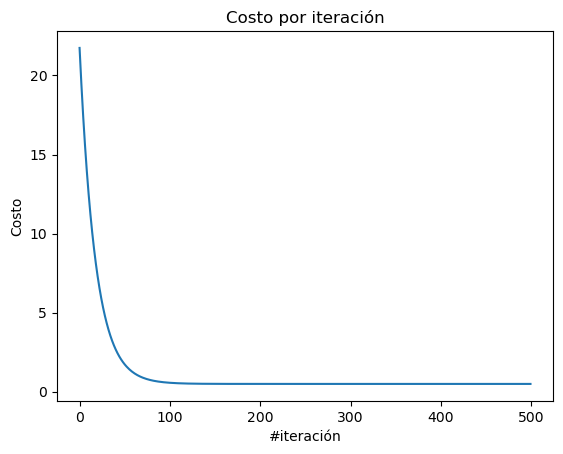

In [11]:
plt.plot(J_hist[:500])

plt.title("Costo por iteración")
plt.ylabel('Costo')
plt.xlabel('#iteración') 

plt.show()

Finalmente, observemos gráficamente como quedaría el modelo sobre los datos

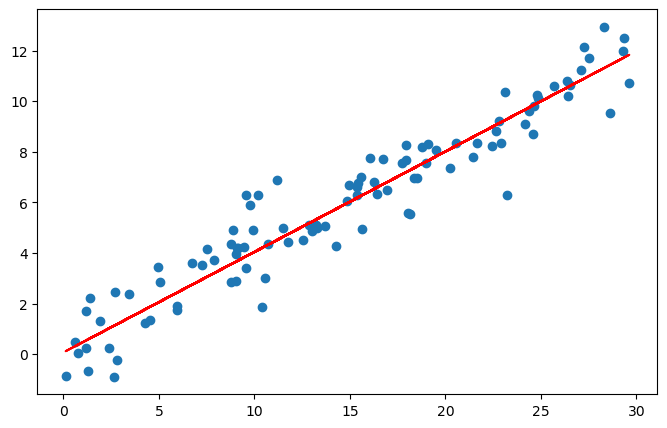

In [12]:
# Graficamos el dataset
plt.figure(figsize=(8,5))
plt.scatter(x_train,y_train)

# Definimos el modelo con los parametros encontrados
y_hat = w_final * x_train + b_final

# Graficamos el modelo con una recta roja
plt.plot(x_train, y_hat, color='r')
plt.show()

## Regresión Lineal con Scikit_learn

Ahora que desarrollamos nuestras propias funciones de regresión lineal veamos como podemos implementarlo usando la librería scikit-learn.

**Actividad 4:**

Comenzar importando de la librería scikit-learn el paquete linear_model que contiene las funciones para hacer Regresion lineal

In [13]:
from sklearn import linear_model

El dataset que creamos anteriormente lo habiamos aplanado usando el método .flatten() para obtener un arreglo en vez de una matriz, para simplificar el manejo de los datos. 

El modelo de regresion lineal de scikit-learn acepta solamente matrices para poder hacer regresion lineal para multiples features. 

En nuestro ejemplo solo tenemos un unico feature y por ello con un arreglo era suficiente, pero para usar la librería debemos transformarlo en una matriz nuevamente. Para ello usamos el método .reshape().

In [15]:
x_train = x_train.reshape(-1, 1)
x_train.shape

(100, 1)

Ahora creamos el modelo de regresion lineal usando el metodo LinearRegression()

In [16]:
regr = linear_model.LinearRegression()

Con el método .fit(x,y) lo que hacemos es ajustar el modelo a los datos.

In [17]:
regr.fit(x_train, y_train)

LinearRegression()

Ahora que tenemos el modelo podemos ver los parametros w y b

In [18]:
# The coefficients
print("Parametros: \n", regr.coef_)

Parametros: 
 [0.38782674]


En este caso, solo w (b=0)

Ahora, resta obtener los valores estimados: $\hat{y}$ para poder graficar el modelo

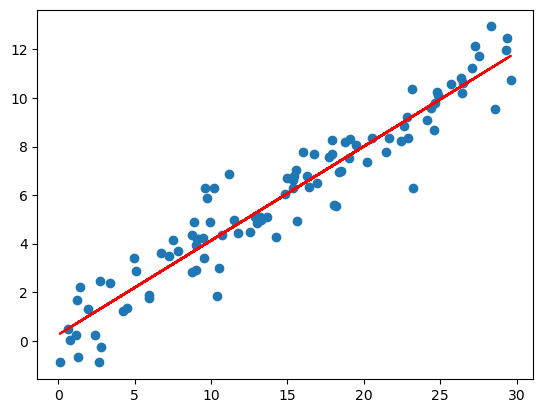

In [19]:
y_pred = regr.predict(x_train)

# Graficamos el modelo con una recta roja sobre el grafico de dispersión del dataset generado
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred,color='r')

plt.show()

Con una pocas líneas de código usando la librería scikit-learn obtenemos un modelo muy similar al conseguido habiendo desarrollado todas las funciones necesarias para desarrollar regresion lineal.
